# Identifing Project Groupings
Looking into the different agencies, Locodes and Project IDs to identify instances of multiple oblgiations for the same project or type of funding in the same timeframe. 

Will look into various geographical locations, as well as the County with the most obligations, Humboldt County. 


In [99]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup, summarize, show_query, arrange, collect

import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl

In [22]:
#! pip install plotnine

In [24]:
from plotnine import *

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [3]:
df = pd.read_csv('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/clean_obligated_waiting.csv', low_memory=False)

/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:73: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [4]:
df.head()

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
1,1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,8,False
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
3,3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


In [6]:
df.prefix.value_counts().sort_values(ascending=False)

HSIP        3367
CML         3334
STP         2817
ER          1607
BRLO        1416
            ... 
STIPL          1
FSPCML         1
HRRRCML        1
BR-NBISL       1
FTACRRS        1
Name: prefix, Length: 335, dtype: int64

In [7]:
df.agency.value_counts().sort_values(ascending=False)

Humboldt County                                           631
Los Angeles                                               543
Fresno                                                    467
Santa Cruz County                                         455
Los Angeles County                                        411
                                                         ... 
Port Hueneme                                                1
Humboldt Bay Harbor Recreation & Conservation District      1
Fresno County Rural Transit Agency                          1
Santa Fe Sprgs                                              1
Ala-Con Costa T                                             1
Name: agency, Length: 671, dtype: int64

## Filtering for entries with Humboldt County


In [9]:
df >> filter(_.agency.str.contains("Humboldt County"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
61,61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaN,NaN,NaN,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False
20186,20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaN,NaN,NaN,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False
20187,20189,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaN,NaN,NaN,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False
20190,20192,HQ,ER,4400(046),Humboldt County,2021-09-09,2021-10-13,NaN,NaN,NaN,131198.09,0.00,148196.20,..,5904,1,Prepared on 9/9/2021,43.00,NaN,NaN,NaN,Alderpoint Road Pm 40.21 To 40.70,Emergency Relief Pr Only,4,2021-08-31,2021-09-09,NON-MPO,NaN,4400,46,False


In [46]:
df_hc = df >> filter(_.agency.str.contains("Humboldt County"))

In [57]:
print(len(df_hc))

631


In [58]:
df_hc >> count(_.locode) >> arrange(-_.n)

,locode,n
0,5904,631


In [59]:
df_hc >> count(_.compare_id_locode)

,compare_id_locode,n
0,False,477
1,True,154


In [55]:
df_hc >> count(_.prefix) >> arrange(-_.n)

,prefix,n
9,ER,381
0,ACST-ER,65
4,BPMPL,50
1,ACSTP,31
5,BRLO,22
7,BRLS,20
12,HSIP,20
13,RPSTP,18
6,BRLOZB,9
2,ATP,5


In [133]:
df_hc_count = df_hc >> count(_.prefix) >> arrange(-_.n)

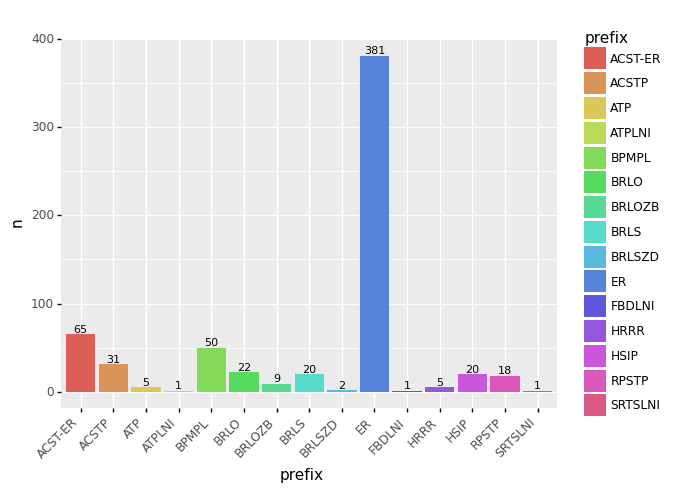

<ggplot: (8736849140465)>

In [147]:
(
    df_hc_count
    >> ggplot(aes("prefix", "n", fill="prefix")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + geom_text(aes(label='n'),                                   
             size=8, va='bottom', format_string='{}')
)

In [138]:
df_hc >> count(_.projectID) >> arrange(-_.n)


,projectID,n
2,32L0,250
6,5904,154
0,20A0,117
4,4400,52
5,4820,31
3,40A0,24
1,28L4,3


In [60]:
df_hc >> count(_.seq) >> arrange(-_.n)

,seq,n
1,2,171
2,3,145
0,1,110
3,4,96
4,5,57
5,6,30
6,7,12
7,8,4
8,9,2
9,10,1


In [61]:
df_hc >> count(_.mpo)

,mpo,n
0,NON-MPO,631


In [63]:
df_hc >> count(_.project_no) >> arrange(-_.n)

,project_no,n
87,32L0(230),7
120,32L0(326),7
196,5904(126),7
197,5904(127),7
63,32L0(121),6
...,...,...
190,5904(119),1
199,5904(130),1
202,5904(135),1
214,5904(152),1


Interesting to see that there are at most 7 entrie for the same project while the sequences go all the way up to 13...

In [83]:
df_hc >> filter(_.seq >= 9) >> arrange(_.project_no)

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
5280,5280,Obligated,BRLSZD,5904(006),Humboldt County,2016-12-08,2016-12-08,2016-12-08,2016-12-08,2016-12-14,-228.08,0.00,9753.05,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,6.00,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,13,NaN,NaN,NON-MPO,NaN,5904,6,True
9844,9844,Obligated,BRLSZD,5904(006),Humboldt County,2014-05-30,2015-02-04,2015-02-05,2015-02-20,2015-02-20,-27390.06,0.00,-28046.40,Authorized,5904,1,E-76 approved on E-76 approved on,250.00,16.00,0.00,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,12,NaN,NaN,NON-MPO,NaN,5904,6,True
3963,3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,11.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),11,NaN,NaN,NON-MPO,NaN,5904,32,True
4326,4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 2/14/2017,0.00,0.00,8.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),10,NaN,NaN,NON-MPO,NaN,5904,32,True
7518,7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,2.00,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),9,NaN,NaN,NON-MPO,NaN,5904,32,True
5412,5412,Obligated,RPSTP,5904(106),Humboldt County,2016-11-17,2016-11-17,2016-11-17,2016-11-17,2016-11-18,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on Prepared on 10/6/2015,0.00,0.00,1.00,NaN,School Rd From Fischer Rd To Salmon Ave In Mck...,Construct Sidewalks And Bike Lanes (tc),9,NaN,NaN,NON-MPO,NaN,5904,106,True


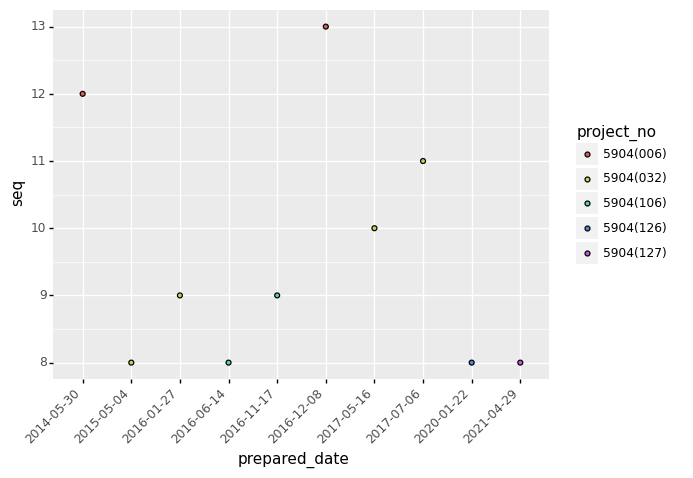

<ggplot: (8736851184394)>

In [92]:
(
    df_hc 
    >> filter(_.seq >= 8) 
    >> group_by(_.project_no)
    >> ggplot(aes("prepared_date", "seq", fill="project_no")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

### ER Funds

In [148]:
df_hc >> filter(_.prefix == "ER")

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,year_initated
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False,2018-01-01
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False,2018-01-01
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False,2018-01-01
181,181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False,2018-01-01
182,182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaN,NaN,NaN,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False,2021-01-01
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaN,NaN,NaN,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False,2021-01-01
20186,20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaN,NaN,NaN,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False,2021-01-01
20187,20189,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaN,NaN,NaN,0.00,9154.33,10340.38,..,5904,1,Prepared on 9/29/2021,37.00,NaN,NaN,NaN,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,NaN,32L0,326,False,2021-01-01


### Looking at Projects with 32L0

In [93]:
df_hc >> filter(_.projectID == "32L0")
             #, _.type_of_work.str.contains("Bridge"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
179,179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,0.00,82857.19,Authorized,5904,1,E-76 approved on,11.00,2.00,7.00,NaN,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,NaN,32L0,132,False
180,180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,0.00,8645.78,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,136,False
181,181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,0.00,12442.17,Authorized,5904,1,E-76 approved on,3.00,2.00,7.00,NaN,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,NaN,32L0,138,False
182,182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,0.00,55676.75,Authorized,5904,1,E-76 approved on,4.00,2.00,7.00,NaN,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,NaN,32L0,164,False
183,183,Obligated,ER,32L0(219),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,13724.04,0.00,15502.14,Authorized,5904,1,E-76 approved on,12.00,2.00,7.00,NaN,"Murray Road Pm 5.57, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,NaN,32L0,219,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20183,20185,HQ,ER,32L0(282),Humboldt County,2021-08-16,2021-09-30,NaN,NaN,NaN,0.00,64581.35,72948.57,..,5904,1,Prepared on 8/16/2021,48.00,NaN,NaN,NaN,"Alderpoint Rd Pm 43.55, Humboldt County Ca",Permanent Restoration,4,2021-08-13,2021-08-16,NON-MPO,NaN,32L0,282,False
20184,20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaN,NaN,NaN,-5261.13,10418.68,21271.47,..,5904,1,Prepared on 8/4/2021,94.00,NaN,NaN,NaN,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,NaN,32L0,319,False
20185,20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaN,NaN,NaN,-10392.51,21845.64,13463.69,..,5904,1,Prepared on 8/3/2021,63.00,NaN,NaN,NaN,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,NaN,32L0,320,False
20186,20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaN,NaN,NaN,0.00,467168.87,527695.55,..,5904,1,Prepared on 8/5/2021,61.00,NaN,NaN,NaN,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,NaN,32L0,325,False


In [104]:
df_hc >> filter(_.projectID == "32L0") >> count(_.seq) >> arrange(-_.n)

,seq,n
0,1,71
1,2,71
2,3,51
3,4,37
4,5,11
5,6,7
6,7,2


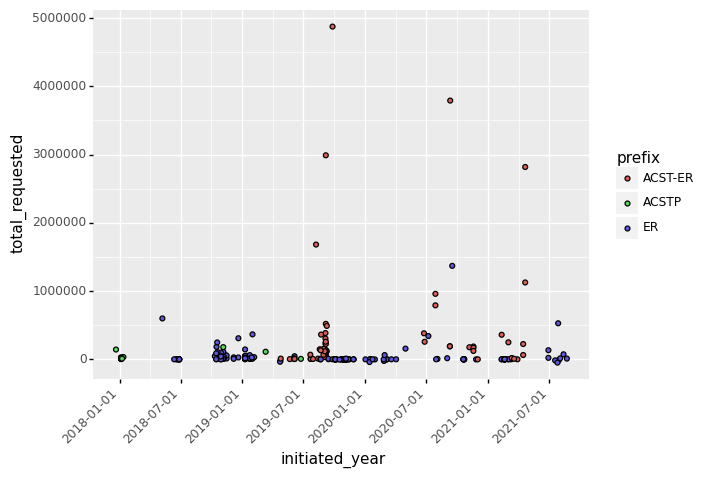

<ggplot: (8736849455927)>

In [129]:
(
    df_hc 
    >> filter(_.projectID == "32L0") 
    >> mutate(initiated_year = _.date_request_initiated.astype("datetime64[ns]"))
    >> group_by(_.projectNO)
    >> ggplot(aes("initiated_year", "total_requested", fill="prefix")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

### Looking at Projects with 5904

In [130]:
df_hc >> filter(_.projectID == "5904")

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,year_initated
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True,NaT
61,61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-01-01
277,277,Obligated,BPMPL,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,0.00,-85411.69,Authorized,5904,1,E-76 approved on,0.00,4.00,1.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,NaN,5904,121,True,2018-01-01
278,278,Obligated,RPSTP,5904(143),Humboldt County,2018-07-06,2018-10-01,2018-11-06,2018-11-07,2018-11-07,550000.00,0.00,550000.00,Authorized,5904,1,E-76 approved on,102.00,37.00,0.00,BIKEPED-A,Humboldt County Between Bracut And Eureka Ajt ...,Class 1 Multi-use Trail (tc),2,2018-06-21,2018-06-21,NON-MPO,NaN,5904,143,True,2018-01-01
467,467,Obligated,BPMPL,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,0.00,-17799.93,Authorized,5904,1,E-76 approved on,NaN,12.00,5.00,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaN,NaN,NON-MPO,NaN,5904,135,True,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,20022,DISTRICT,ATP,5904(151),Humboldt County,2021-10-22,NaN,NaN,NaN,NaN,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaN,NaN,NON-MPO,NaN,5904,151,True,NaT
20021,20023,DISTRICT,BPMPL,5904(156),Humboldt County,2021-08-05,NaN,NaN,NaN,NaN,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaN,NaN,NON-MPO,NaN,5904,156,True,NaT
20022,20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaN,NaN,NaN,NaN,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaN,NaN,NON-MPO,NaN,5904,165,True,NaT
20023,20025,DISTRICT,HSIP,5904(181),Humboldt County,2021-10-20,NaN,NaN,NaN,NaN,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaN,NaN,NON-MPO,NaN,5904,181,True,NaT


In [131]:
df_hc >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode,year_initated
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True,NaT
61,61,Obligated,BPMPL,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,0.00,24420.00,Authorized,5904,1,E-76 approved on,0.00,8.00,0.00,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,NaN,5904,157,True,2018-01-01
277,277,Obligated,BPMPL,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,0.00,-85411.69,Authorized,5904,1,E-76 approved on,0.00,4.00,1.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,NaN,5904,121,True,2018-01-01
467,467,Obligated,BPMPL,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,0.00,-17799.93,Authorized,5904,1,E-76 approved on,NaN,12.00,5.00,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaN,NaN,NON-MPO,NaN,5904,135,True,NaT
468,468,Obligated,BPMPL,5904(139),Humboldt County,2018-08-31,2018-10-01,2018-10-10,2018-10-12,2018-10-15,-123758.02,0.00,-132486.70,Authorized,5904,1,E-76 approved on,33.00,11.00,3.00,HBPLOCAL,Holmes Flat Road Over Larabee Low Level-eel River,Bridge Preventative Maintenance,3,2018-08-29,2018-08-29,NON-MPO,NaN,5904,139,True,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249,19251,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,-48480.20,0.00,-46125.83,Authorized,5904,1,E-76 approved on,264.00,13.00,14.00,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,8,2020-08-28,2021-05-18,NON-MPO,NaN,5904,127,True,2020-01-01
20019,20021,DISTRICT,BPMPL,5904(141),Humboldt County,2021-08-11,NaN,NaN,NaN,NaN,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaN,NaN,NON-MPO,NaN,5904,141,True,NaT
20021,20023,DISTRICT,BPMPL,5904(156),Humboldt County,2021-08-05,NaN,NaN,NaN,NaN,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaN,NaN,NON-MPO,NaN,5904,156,True,NaT
20022,20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaN,NaN,NaN,NaN,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaN,NaN,NON-MPO,NaN,5904,165,True,NaT


In [29]:
## 88 rows of all bridge related funding obligations- appears from this small subset that HBPLOCAL is the FTIP Code, 
### yet, we have various Prefix Codes.

In [140]:
(df_hc 
    >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))
    >> count(_.project_no) >> arrange(-_.n)
)

,project_no,n
11,5904(126),7
12,5904(127),7
4,5904(113),6
5,5904(118),5
9,5904(122),5
18,5904(141),5
2,5904(092),4
8,5904(121),4
16,5904(139),4
3,5904(112),3


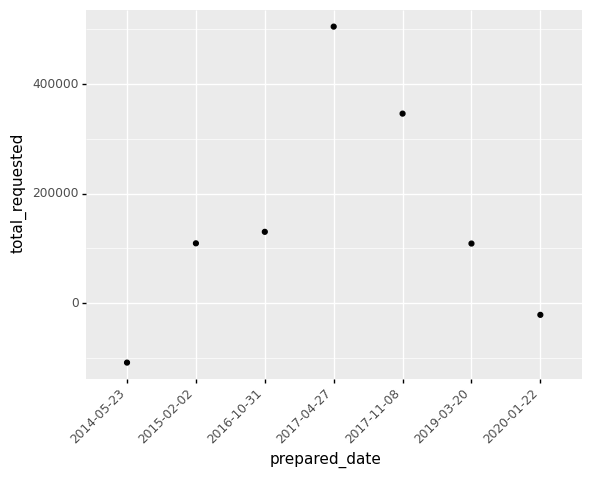

<ggplot: (8736849131255)>

In [142]:
## mplotting to see the timeline of one project 5904(126)
(df_hc 
    >> filter(_.project_no == "5904(126)")
    >> ggplot(aes("prepared_date", "total_requested")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)